### Step 1 : Importing and understanding the data 

In [2]:
#importing various libraries and methods which are used in the code

import numpy as np
import pandas as pd
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
bike = pd.read_csv('day.csv')

In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Changing the data type for Variable dteday from object to datetime

In [8]:
bike['dteday']=pd.to_datetime(bike['dteday'], format='%d-%m-%Y')

In [9]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

### Checking and updating the distribution for categorical variables for ease in EDA & visualisation

In [12]:
bike['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [13]:
bike['season']=bike.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [14]:
bike['season'].value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [15]:
bike['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [16]:
bike['mnth']=bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [17]:
bike['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [18]:
bike['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [19]:
bike['weekday']=bike['weekday'].map({0:'Sun',1:'Mon',2:'Tues',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [20]:
bike['weekday'].value_counts()

weekday
Sat     105
Sun     105
Mon     105
Tues    104
Thu     104
Fri     104
Wed     103
Name: count, dtype: int64

In [21]:
bike['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [22]:
bike['weathersit']=bike['weathersit'].map({1:'Clear',2:'Mist + Clouds',3:'Light Rain/Snow',4:'Heavy Rain'})

In [23]:
bike['weathersit'].value_counts()

weathersit
Clear              463
Mist + Clouds      246
Light Rain/Snow     21
Name: count, dtype: int64

In [24]:
bike['yr'].value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [25]:
bike['year']=bike['yr'].map({0:'2018',1:'2019'})

In [26]:
bike['year'].value_counts()

year
2018    365
2019    365
Name: count, dtype: int64

In [27]:
bike['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [28]:
bike['holiday_cat']=bike['holiday'].map({0:'No',1:'Yes'})

In [29]:
bike['holiday_cat'].value_counts()

holiday_cat
No     709
Yes     21
Name: count, dtype: int64

In [30]:
bike['workingday'].value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [31]:
bike['workingday_cat']=bike['workingday'].map({0:'No',1:'Yes'})

In [32]:
bike['workingday_cat'].value_counts()

workingday_cat
Yes    499
No     231
Name: count, dtype: int64

In [33]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   instant         730 non-null    int64         
 1   dteday          730 non-null    datetime64[ns]
 2   season          730 non-null    object        
 3   yr              730 non-null    int64         
 4   mnth            730 non-null    object        
 5   holiday         730 non-null    int64         
 6   weekday         730 non-null    object        
 7   workingday      730 non-null    int64         
 8   weathersit      730 non-null    object        
 9   temp            730 non-null    float64       
 10  atemp           730 non-null    float64       
 11  hum             730 non-null    float64       
 12  windspeed       730 non-null    float64       
 13  casual          730 non-null    int64         
 14  registered      730 non-null    int64         
 15  cnt   

In [34]:
#dropping casual and registered as cnt will be the target variable which combines both. also dropping instant 
bike = bike.drop(columns=['instant','casual','registered'],axis = 1)

In [35]:
bike.describe()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018-12-31 12:00:00,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2018-07-02 06:00:00,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,2018-12-31 12:00:00,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,2019-07-01 18:00:00,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,2019-12-31 00:00:00,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000
std,NaN,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647


## Looking at effect of categorical variables on the dependent variable

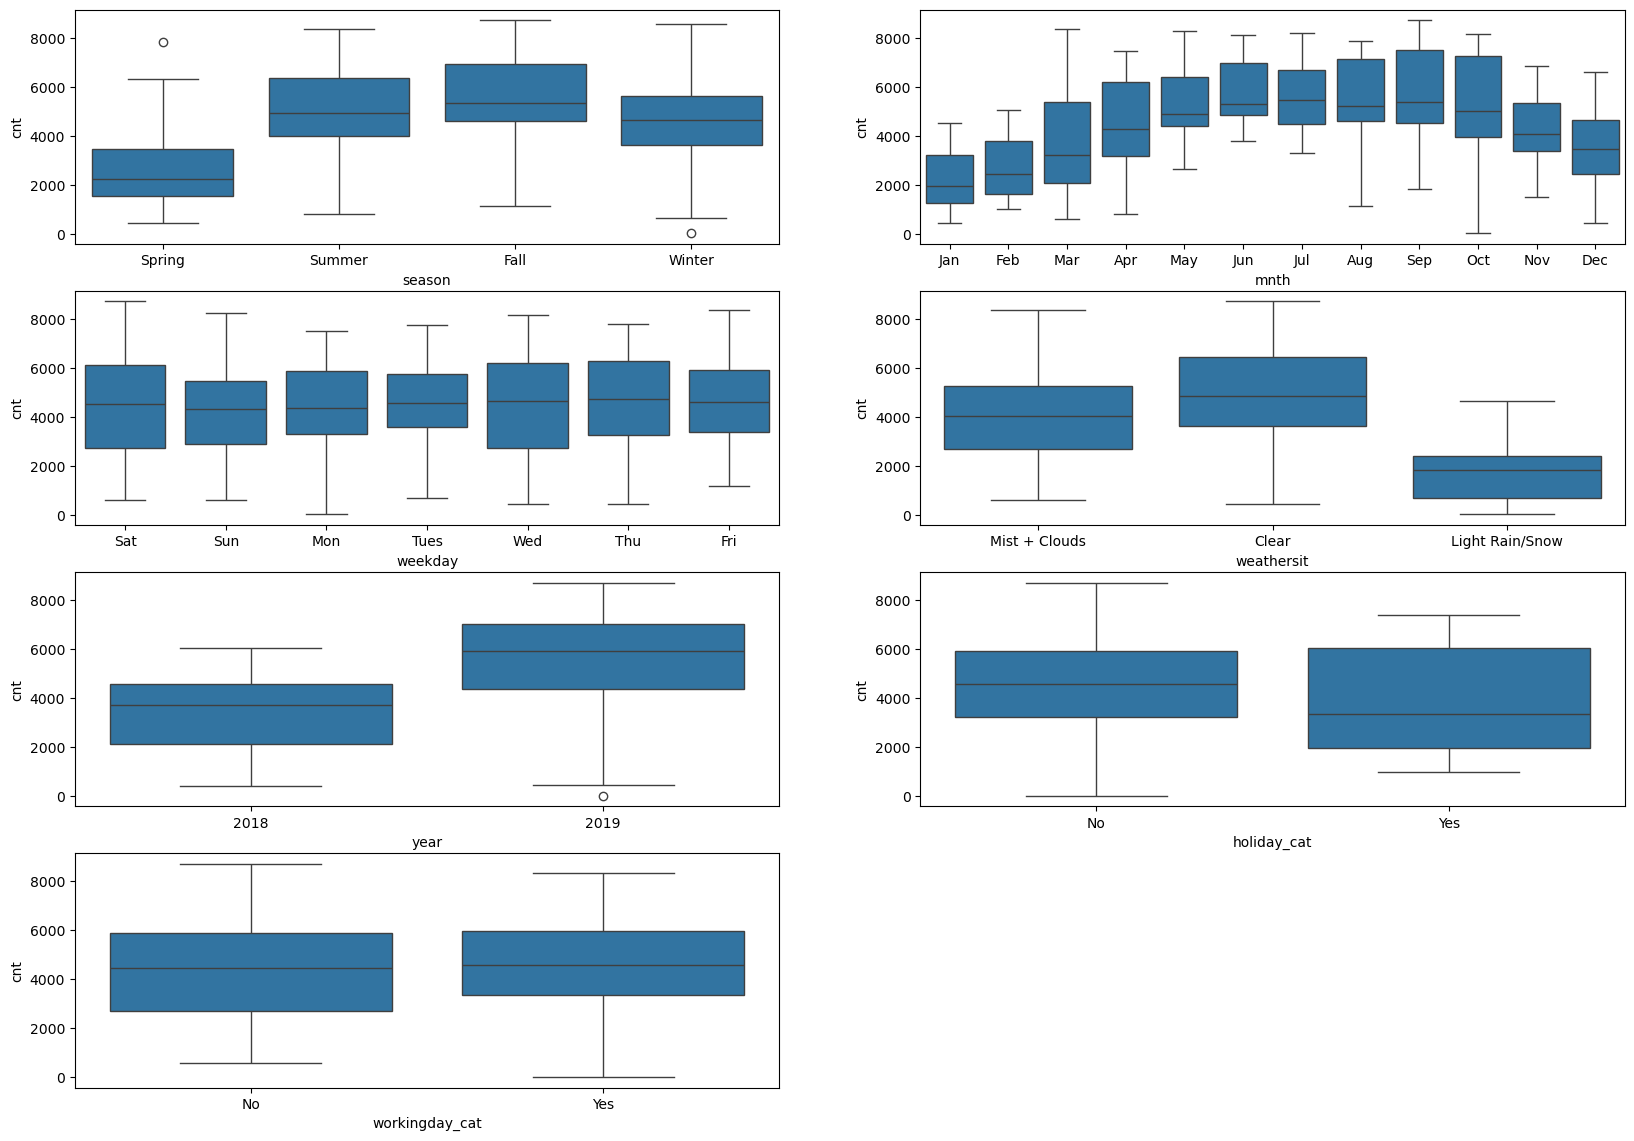

In [37]:
plt.figure(figsize=(20, 14))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(4,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(4,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(4,2,5)
sns.boxplot(x = 'year', y = 'cnt', data = bike)
plt.subplot(4,2,6)
sns.boxplot(x = 'holiday_cat', y = 'cnt', data = bike)
plt.subplot(4,2,7)
sns.boxplot(x = 'workingday_cat', y = 'cnt', data = bike)

plt.show()

### Looking at pair plot among numerical variables

<Figure size 2500x2500 with 0 Axes>

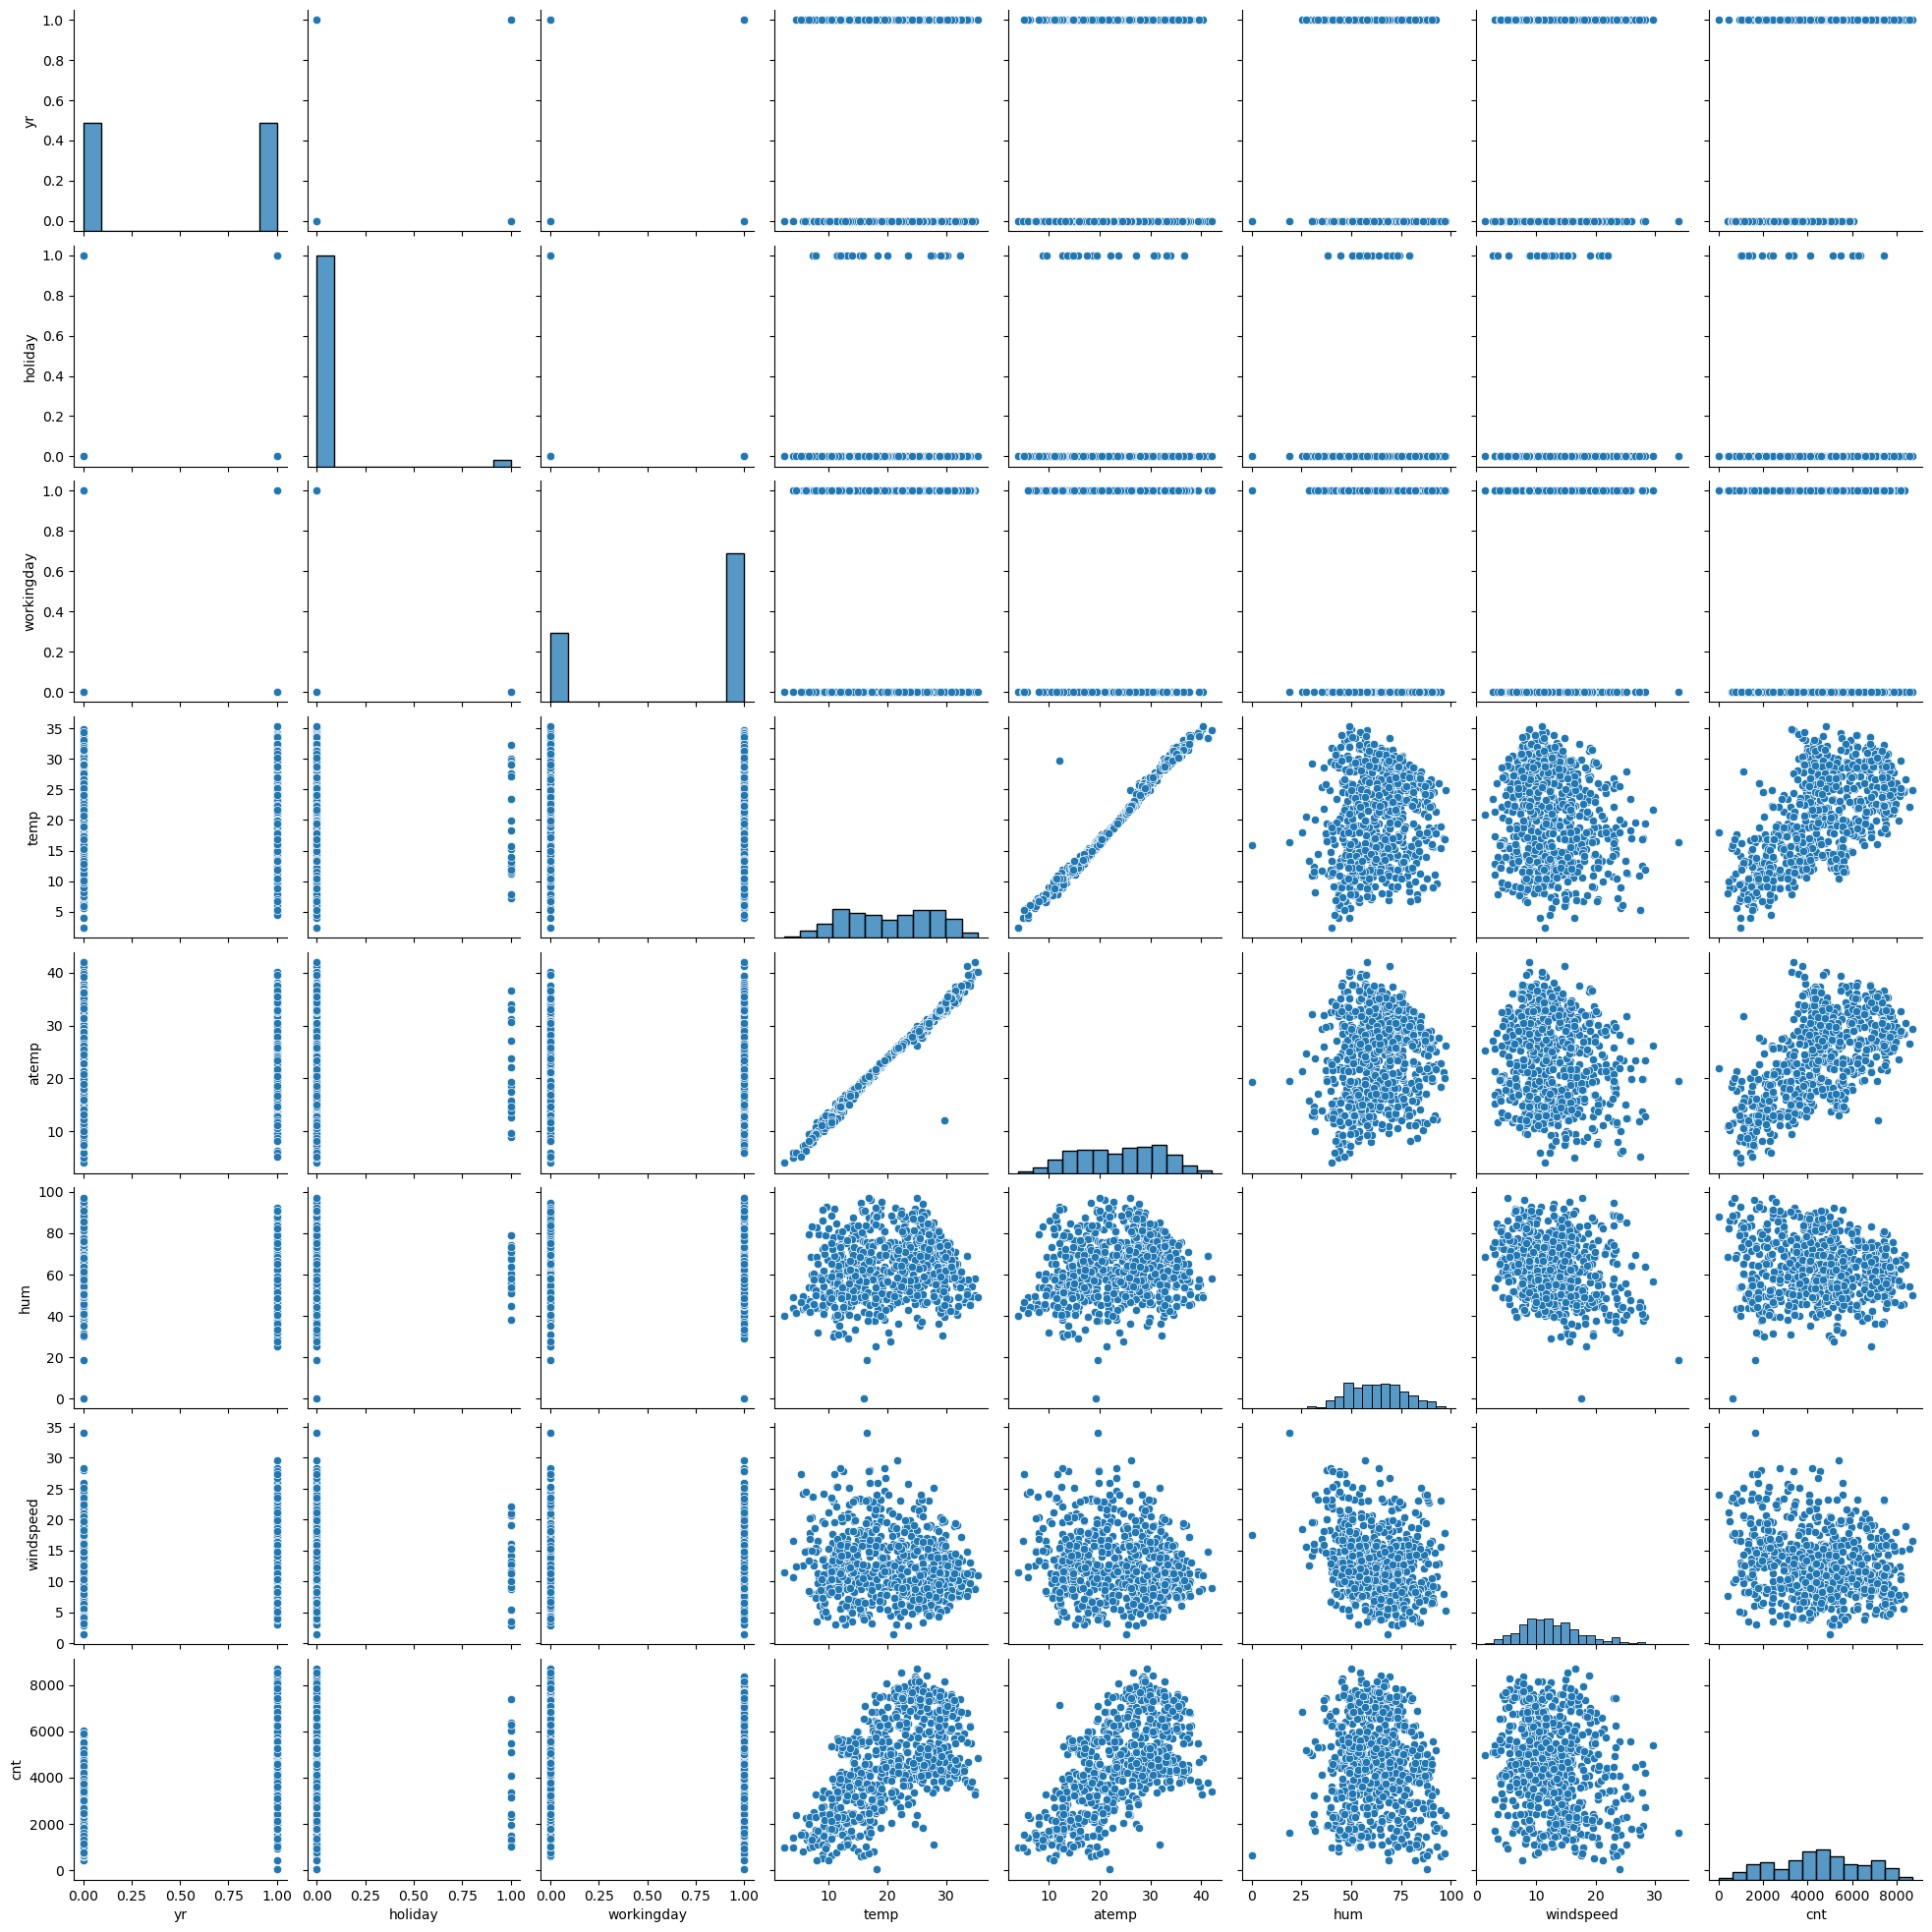

In [39]:
plt.figure(figsize = (25,25))
sns.pairplot(bike)
plt.show()

#### It can be seen from the above pair plot that our target variable cnt has the highest correlation with temp.

### Step 2 Preparing the data for modelling
- Encoding categorical variables to dummy variables


In [42]:
# Let's drop the first column from season df using 'drop_first = True'
season = pd.get_dummies(bike['season'], drop_first = True).astype(int)

# Add the results to the original bike dataframe
bike = pd.concat([bike, season], axis = 1)

# Now let's see the head of our dataframe.
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,holiday_cat,workingday_cat,Spring,Summer,Winter
0,2018-01-01,Spring,0,Jan,0,Sat,0,Mist + Clouds,14.110847,18.18125,80.5833,10.749882,985,2018,No,No,1,0,0
1,2018-01-02,Spring,0,Jan,0,Sun,0,Mist + Clouds,14.902598,17.68695,69.6087,16.652113,801,2018,No,No,1,0,0
2,2018-01-03,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018,No,Yes,1,0,0
3,2018-01-04,Spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018,No,Yes,1,0,0
4,2018-01-05,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018,No,Yes,1,0,0


In [43]:
# Repeating the above for mnth, weekday and weathersit'
mnth = pd.get_dummies(bike['mnth'], drop_first = True).astype(int)
weekday = pd.get_dummies(bike['weekday'], drop_first = True).astype(int)
weathersit = pd.get_dummies(bike['weathersit'], drop_first = True).astype(int)

# Add the results to the original bike dataframe
bike = pd.concat([bike, mnth], axis = 1)
bike = pd.concat([bike, weekday], axis = 1)
bike = pd.concat([bike, weathersit], axis = 1)

# Now let's see the head of our dataframe.
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,Oct,Sep,Mon,Sat,Sun,Thu,Tues,Wed,Light Rain/Snow,Mist + Clouds
0,2018-01-01,Spring,0,Jan,0,Sat,0,Mist + Clouds,14.110847,18.18125,...,0,0,0,1,0,0,0,0,0,1
1,2018-01-02,Spring,0,Jan,0,Sun,0,Mist + Clouds,14.902598,17.68695,...,0,0,0,0,1,0,0,0,0,1
2,2018-01-03,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0
3,2018-01-04,Spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,...,0,0,0,0,0,0,1,0,0,0
4,2018-01-05,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,...,0,0,0,0,0,0,0,1,0,0


In [44]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   dteday           730 non-null    datetime64[ns]
 1   season           730 non-null    object        
 2   yr               730 non-null    int64         
 3   mnth             730 non-null    object        
 4   holiday          730 non-null    int64         
 5   weekday          730 non-null    object        
 6   workingday       730 non-null    int64         
 7   weathersit       730 non-null    object        
 8   temp             730 non-null    float64       
 9   atemp            730 non-null    float64       
 10  hum              730 non-null    float64       
 11  windspeed        730 non-null    float64       
 12  cnt              730 non-null    int64         
 13  year             730 non-null    object        
 14  holiday_cat      730 non-null    object   

In [45]:
#dropping object type variables and also dropping dteday as it will be factored in under dummy variables for season, months etc
bike = bike.drop(columns=['dteday','season','mnth','weekday','weathersit','year','holiday_cat','workingday_cat'],axis = 1)

# Now let's see the head of our dataframe.
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tues,Wed,Light Rain/Snow,Mist + Clouds
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   Spring           730 non-null    int32  
 9   Summer           730 non-null    int32  
 10  Winter           730 non-null    int32  
 11  Aug              730 non-null    int32  
 12  Dec              730 non-null    int32  
 13  Feb              730 non-null    int32  
 14  Jan              730 non-null    int32  
 15  Jul              730 non-null    int32  
 16  Jun              730 non-null    int32  
 17  Mar             

### Splitting the Data into Training and Testing Sets

In [48]:
df_train, df_test = train_test_split(bike, train_size = 0.7, random_state = 100)
print(df_train.shape)
df_test.shape

(510, 30)


(220, 30)

### Rescaling the Features

We will use MinMax scaling

In [50]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tues,Wed,Light Rain/Snow,Mist + Clouds
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [51]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Training the model

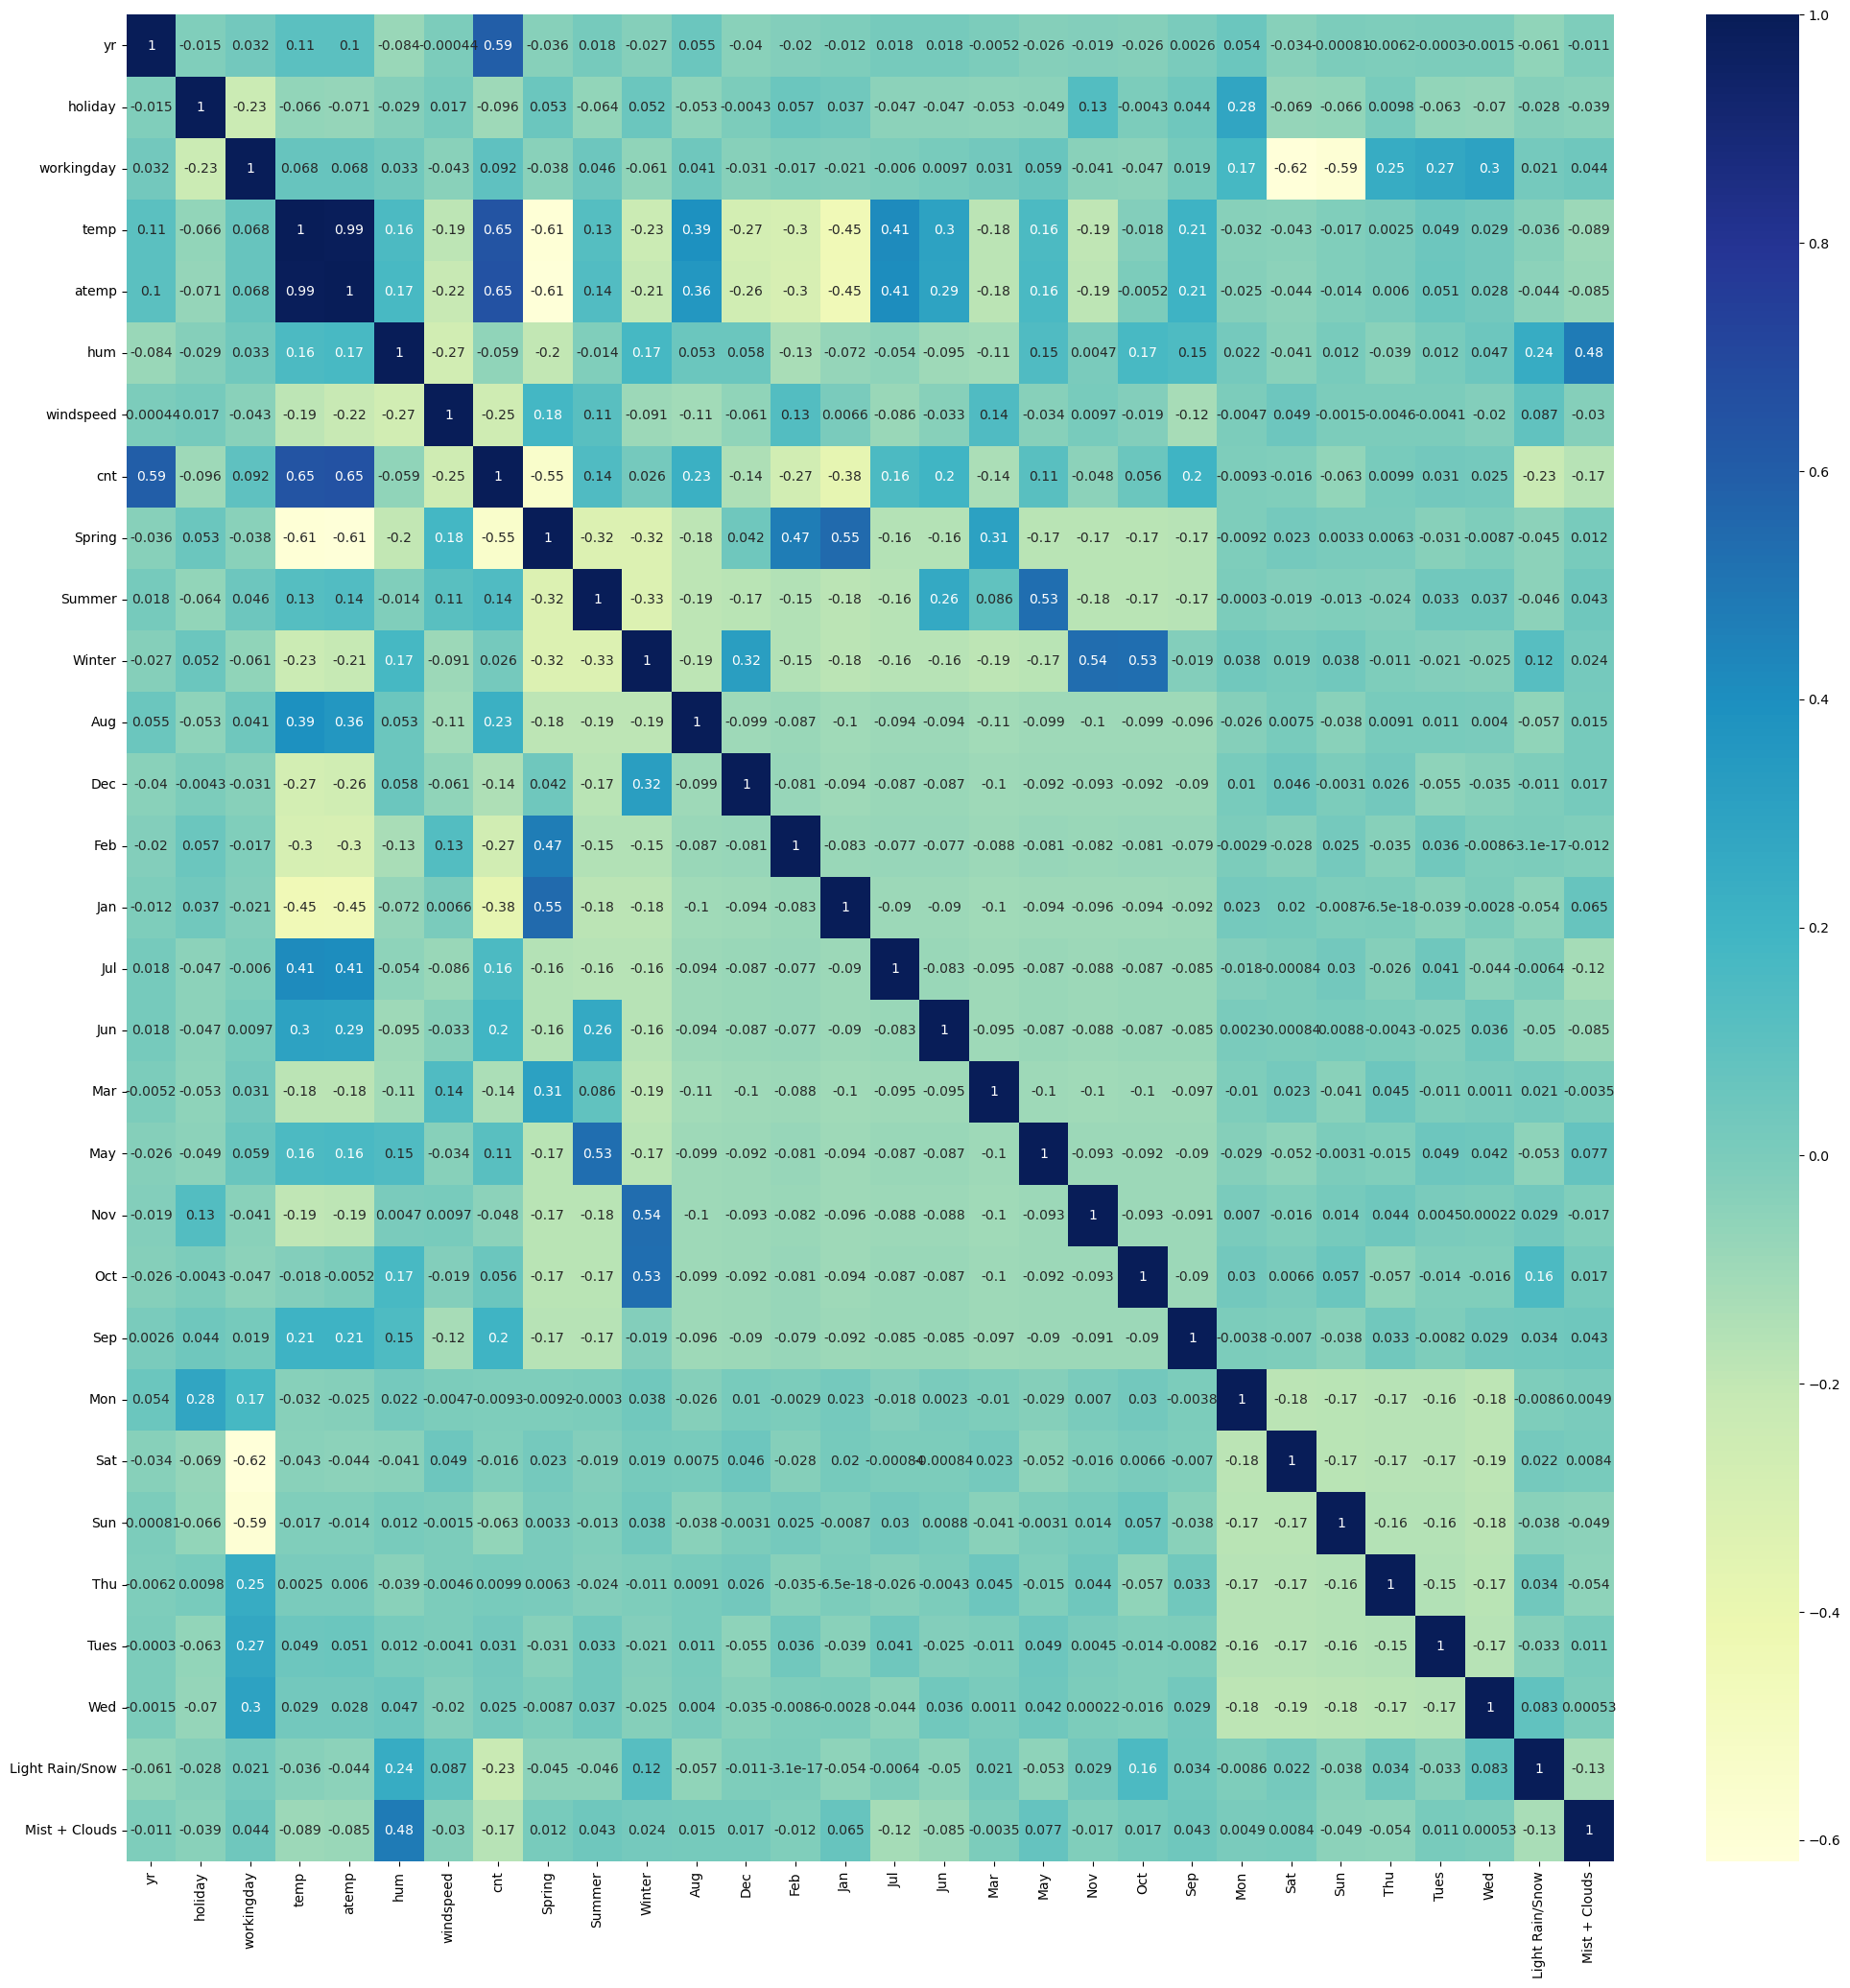

In [53]:
#heatmap
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Target variable cnt has maximum correlation with temp so we will start our model building with this variable temp 

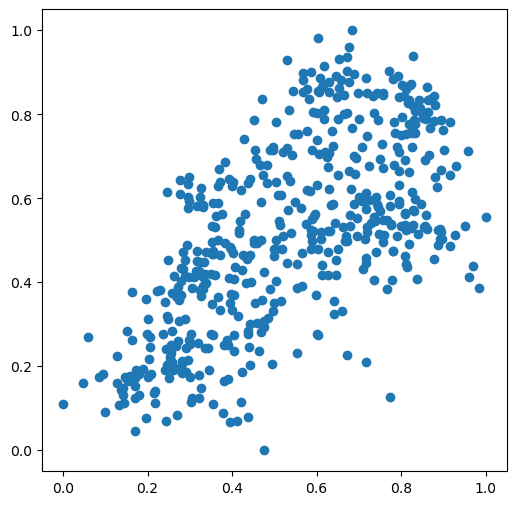

In [55]:
#checking/showing the linear relationship between target variable cnt and independent varaible temp

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [56]:
y_train = df_train.pop('cnt')
X_train = df_train

In [57]:
import statsmodels.api as sm

# Adding a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Creating a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [58]:
# Checking the parameters obtained

lr.params

const    0.169031
temp     0.640944
dtype: float64

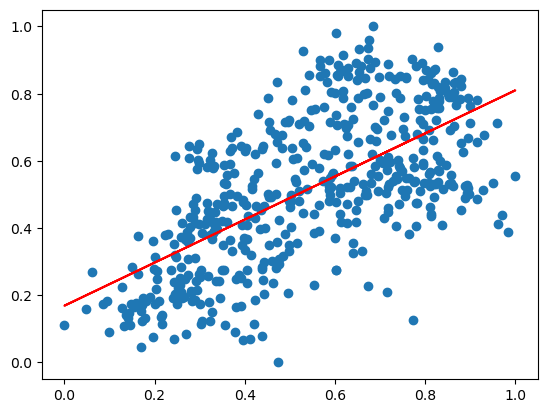

In [59]:
# Visualising the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169 + 0.641*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [60]:
#Summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           2.46e-61
Time:                        19:46:24   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.0

### Adding another variable

- As p-value is 0, the variable we chose (temp) is significant. The R-squared value obtained is 0.416 which means that 41.6% of the variance in cnt cane be explained by temp. This is a good starting point for building the model, but as we have many variables, let us try to do better than this and add the second most highly correlated variable, i.e. yr.

In [62]:
# Assigning the feature variables to X
X_train_lm = X_train[['temp', 'yr']]

In [63]:
# Building a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [64]:
# Checking the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          3.34e-130
Time:                        19:46:24   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.0

#### As p-value is 0 for both the variables we chose (temp and yr) they are significant. We have clearly improved the model as the value of adjusted R-squared has gone up to 0.690 from 0.415. Approx. 69% of variation in cnt can be explained by these two variables. The coefficient of temp has gone down to 0.58 from 0.64 earlier. Now we add the next most correlated variable Spring (though it is negatively correlated).


In [66]:
# Assigning the feature variables to X
X_train_lm = X_train[['temp', 'yr','Spring']]

In [67]:
# Building a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     0.201605
temp      0.418072
yr        0.240374
Spring   -0.143401
dtype: float64

In [68]:
# Checking the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     477.7
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          3.81e-147
Time:                        19:46:25   Log-Likelihood:                 381.47
No. Observations:                 510   AIC:                            -754.9
Df Residuals:                     506   BIC:                            -738.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2016      0.019     10.769      0.0

#### As p-value is 0 for all the variables we chose (temp, yr and Spring) they are significant. We have clearly improved the model as the value of adjusted R-squared has gone up from 0.692 to 0.737. Approx. 74% of variation in cnt can be explained by these three variables. The coefficient of temp has gone down from 0.58 to 0.42 earlier. As expected Spring has a negative coefficient, which implies if the value of Spring increases, the value of cnt goes down. Now we add the next most correlated variable Jan.


In [70]:
# Assigning the feature variables to X
X_train_lm = X_train[['temp', 'yr','Spring','Jan']]

In [71]:
# Building a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     0.206853
temp      0.409092
yr        0.240903
Spring   -0.132134
Jan      -0.038880
dtype: float64

In [72]:
# Checking the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     360.6
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          1.85e-146
Time:                        19:46:25   Log-Likelihood:                 383.07
No. Observations:                 510   AIC:                            -756.1
Df Residuals:                     505   BIC:                            -735.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2069      0.019     10.939      0.0

#### As p-value for Jan is 0.075, it is statistically insignificant and we will not add this variable to the model. Now we add the next most correlated variable 'Mist + Clouds' (though it is negatively correlated).

In [74]:
# Assigning the feature variables to X
X_train_lm = X_train[['temp', 'yr','Spring','Mist + Clouds']]
# Building a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

# Checking the summary
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     387.6
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          2.32e-152
Time:                        19:46:25   Log-Likelihood:                 396.82
No. Observations:                 510   AIC:                            -783.6
Df Residuals:                     505   BIC:                            -762.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2315      0.019     12.215

#### As p-value is 0 for all the variables we chose (temp, yr, Spring and Mist + Clouds) they are significant. We have clearly improved the model as the value of adjusted R-squared has gone up to 0.752 from 0.737. Approx. 75% of variation in cnt can be explained by these four variables. The coefficient of temp has gone down to 0.40 from 0.42 earlier. As expected Mist + Clouds has a negative coefficient, which implies if the value of Mist + Clouds increases, the value of cnt goes down. Now we add the next most correlated variable 'Light Rain/Snow'(though it is negatively correlated).

In [76]:
# Assigning the feature variables to X
X_train_lm = X_train[['temp', 'yr','Spring','Mist + Clouds','Light Rain/Snow']]
# Building a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

# Checking the summary
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     400.1
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          7.56e-173
Time:                        19:46:25   Log-Likelihood:                 447.72
No. Observations:                 510   AIC:                            -883.4
Df Residuals:                     504   BIC:                            -858.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2629      0.017     

#### As p-value is 0 for all the variables we chose (temp, yr, Spring, Mist + Clouds and Light Rain/Snow) they are significant. We have clearly improved the model as the value of adjusted R-squared has gone up from 0.737 to 0.797. Approx. 79% of variation in cnt can be explained by these five variables. The coefficient of temp has gone down to 0.38 from 0.40 earlier. As expected Light Rain/Snow has a negative coefficient, which implies if the value of Light Rain/Snow increases, the value of cnt goes down. Now we add the next most correlated variable Aug.

In [78]:
# Assigning the feature variables to X
X_train_lm = X_train[['temp', 'yr','Spring','Mist + Clouds','Light Rain/Snow','Aug']]
# Building a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

# Checking the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     333.3
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          1.13e-171
Time:                        19:46:25   Log-Likelihood:                 448.06
No. Observations:                 510   AIC:                            -882.1
Df Residuals:                     503   BIC:                            -852.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2597      0.018     

#### As p-value for Aug is 0.41, it is statistically insignificant and we will not add this variable to the model. Now we add the next most correlated variable Summer.

In [80]:
# Assigning the feature variables to X
X_train_lm = X_train[['temp', 'yr','Spring','Mist + Clouds','Light Rain/Snow','Summer']]
# Building a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

# Checking the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     333.7
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          8.95e-172
Time:                        19:46:25   Log-Likelihood:                 448.30
No. Observations:                 510   AIC:                            -882.6
Df Residuals:                     503   BIC:                            -853.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2683      0.018     

#### As p-value for Summer is 0.281, it is statistically insignificant and we will not add this variable to the model. Now we add the next most correlated variable holiday (though it is negatively correlated).

In [82]:
# Assigning the feature variables to X
X_train_lm_1 = X_train[['temp', 'yr','Spring','Mist + Clouds','Light Rain/Snow','holiday']]
# Building a linear model

import statsmodels.api as sm
X_train_lm_1 = sm.add_constant(X_train_lm_1)

lr = sm.OLS(y_train, X_train_lm_1).fit()

# Checking the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     340.0
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          2.10e-173
Time:                        19:46:25   Log-Likelihood:                 452.11
No. Observations:                 510   AIC:                            -890.2
Df Residuals:                     503   BIC:                            -860.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2676      0.017     

#### As p-value is 0 for all the variables we chose (temp, yr, Spring, Mist + Clouds, Light Rain/Snow, holiday) they are significant. We have clearly improved the model as the value of adjusted R-squared has gone up from 0.797 to 0.80. Approx. 80% of variation in cnt can be explained by these six variables. The coefficient of temp has gone down to 0.23 from 0.38 earlier. As expected holiday has a negative coefficient, which implies if the value of Light Rain/Snow increases, the value of cnt goes down.

- The final equation is cnt = 0.268 + 0.375*temp + 0.235*yr - 0.160*Spring - 0.074*(Mist + Clouds) - 0.287*(Light Rain/Snow) - 0.084*holiday

In [84]:
X_train_lm_1.head()

,const,temp,yr,Spring,Mist + Clouds,Light Rain/Snow,holiday
576,1.0,0.815169,1,0,0,0,0
426,1.0,0.442393,1,1,1,0,0
728,1.0,0.245101,1,1,0,0,0
482,1.0,0.395666,1,0,1,0,0
111,1.0,0.345824,0,0,1,0,0


In [85]:
X_train_lm_2 = X_train_lm_1.drop(["const"], axis = 1)

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,2.21
1,yr,2.00
3,Mist + Clouds,1.43
2,Spring,1.18
4,Light Rain/Snow,1.03
5,holiday,1.03


#### We have validated the No multicollinearity assumption of Linear Regression, as the VIF between all the independent variables is less than 5. 



### Residual Analysis

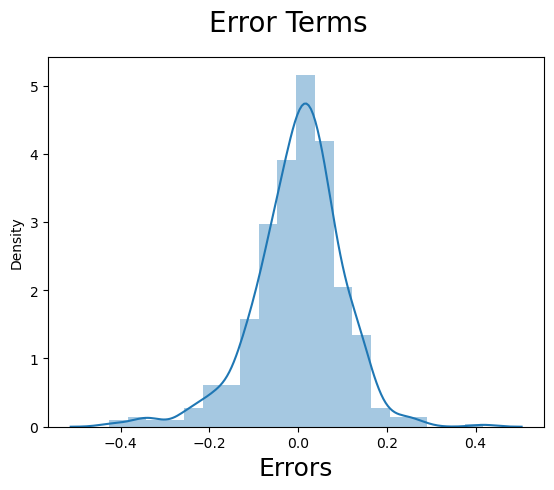

In [89]:
y_train_1_cnt = lr.predict(X_train_lm_1)
# Plotting the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_1_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

#### We can see that the error terms are normally distributed with a mean value of 0. Thus we have validated the normality assumption of Linear Regression. 



In [91]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tues,Wed,Light Rain/Snow,Mist + Clouds
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
y_test = df_test.pop('cnt')

In [93]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [94]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tues,Wed,Light Rain/Snow,Mist + Clouds
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [95]:
X_test = df_test[["temp","yr","Spring","Mist + Clouds","Light Rain/Snow","holiday"]]

In [96]:
X_test.head()

,temp,yr,Spring,Mist + Clouds,Light Rain/Snow,holiday
184,0.831783,0,0,1,0,1
535,0.901354,1,0,0,0,0
299,0.511964,0,0,1,0,0
221,0.881625,0,0,0,0,0
152,0.817246,0,0,0,0,0


In [97]:
# Adding constant variable to test dataframe
X_test_model = sm.add_constant(X_test)

In [98]:
X_test_model.head()

,const,temp,yr,Spring,Mist + Clouds,Light Rain/Snow,holiday
184,1.0,0.831783,0,0,1,0,1
535,1.0,0.901354,1,0,0,0,0
299,1.0,0.511964,0,0,1,0,0
221,1.0,0.881625,0,0,0,0,0
152,1.0,0.817246,0,0,0,0,0


In [99]:
# Making predictions using the model

y_pred = lr.predict(X_test_model)

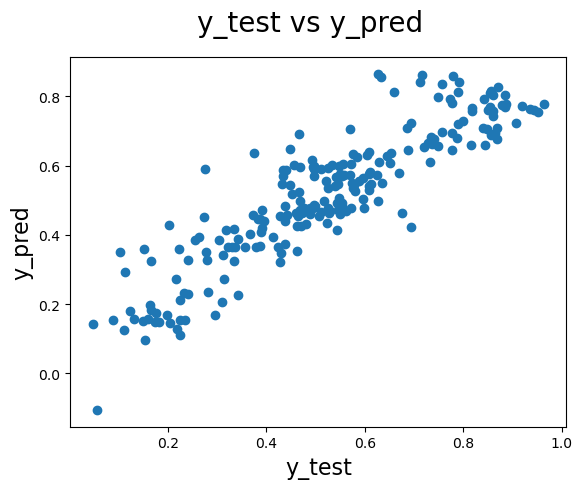

In [100]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 16)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

In [101]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7981213892101768

# The r2_score for the model created manually is coming out to around 0.798.

# Building model using RFE

In [104]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)

rfe = RFE(lin_mod, step=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [105]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 2),
 ('Winter', True, 1),
 ('Aug', False, 2),
 ('Dec', False, 2),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sep', False, 2),
 ('Mon', False, 2),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 2),
 ('Tues', False, 2),
 ('Wed', False, 2),
 ('Light Rain/Snow', True, 1),
 ('Mist + Clouds', False, 2)]

In [106]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Spring', 'Winter', 'Jan', 'Jul', 'Sat', 'Sun', 'Light Rain/Snow'],
      dtype='object')

In [107]:
X_train.columns[~rfe.support_]

Index(['Summer', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Thu', 'Tues', 'Wed', 'Mist + Clouds'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [109]:
# Creating training dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [110]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [111]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.2
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          9.73e-182
Time:                        19:46:28   Log-Likelihood:                 491.85
No. Observations:                 510   AIC:                            -955.7
Df Residuals:                     496   BIC:                            -896.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2814      0.026     



#### holiday is statistically insignificant because of high p value (0.602) and can be dropped



In [113]:
#rebuilding the model without holiday

X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.2
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          9.73e-182
Time:                        19:46:28   Log-Likelihood:                 491.85
No. Observations:                 510   AIC:                            -955.7
Df Residuals:                     496   BIC:                            -896.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2929      0.041     



#### atemp is statistically insignificant because of high p value (0.368) and can be dropped



In [115]:
#rebuilding the model without atemp

X_train_new2 = X_train_new.drop(["atemp"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.9
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          1.00e-182
Time:                        19:46:28   Log-Likelihood:                 491.43
No. Observations:                 510   AIC:                            -956.9
Df Residuals:                     497   BIC:                            -901.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2943      0.041     



#### Sun is statistically insignificant because of high p value (0.075) and can be dropped



In [117]:
#rebuilding the model without Sun

X_train_new3 = X_train_new2.drop(["Sun"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new3)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.0
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          3.20e-183
Time:                        19:46:28   Log-Likelihood:                 489.80
No. Observations:                 510   AIC:                            -955.6
Df Residuals:                     498   BIC:                            -904.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3370      0.033     

In [118]:
X_train_new3.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Jan', 'Jul', 'Sat', 'Light Rain/Snow'],
      dtype='object')

In [119]:
X_train_new3 = X_train_new3.drop(['const'], axis=1)

In [120]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.70
2,temp,14.06
1,workingday,4.64
4,windspeed,4.09
5,Spring,2.79
0,yr,2.07
6,Winter,1.98
9,Sat,1.82
7,Jan,1.67
8,Jul,1.36




#### hum has high VIF (16.7) and can be dropped



In [122]:
#rebuilding the model without hum

X_train_new4 = X_train_new3.drop(["hum"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new4)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     210.1
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          1.00e-171
Time:                        19:46:28   Log-Likelihood:                 459.81
No. Observations:                 510   AIC:                            -897.6
Df Residuals:                     499   BIC:                            -851.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1798      0.028     

In [123]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.42
3,windspeed,4.07
4,Spring,2.35
0,yr,2.07
8,Sat,1.78
6,Jan,1.60
5,Winter,1.42
7,Jul,1.30
9,Light Rain/Snow,1.06




#### temp has high VIF (6.1) and can be dropped



In [125]:
#rebuilding the model without temp

X_train_new5 = X_train_new4.drop(["temp"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new5)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     151.8
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          7.05e-137
Time:                        19:46:29   Log-Likelihood:                 374.80
No. Observations:                 510   AIC:                            -729.6
Df Residuals:                     500   BIC:                            -687.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5023      0.018     



#### Jul is statistically insignificant because of high p value (0.275) and can be dropped



In [127]:
#rebuilding the model without Jul

X_train_new6 = X_train_new5.drop(["Jul"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new6)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     170.6
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          9.45e-138
Time:                        19:46:29   Log-Likelihood:                 374.20
No. Observations:                 510   AIC:                            -730.4
Df Residuals:                     501   BIC:                            -692.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5068      0.018     

In [128]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.43
1,workingday,2.84
3,Spring,2.10
0,yr,1.86
5,Jan,1.59
6,Sat,1.47
4,Winter,1.37
7,Light Rain/Snow,1.06


#### As all the VIF values are below 5 and all the p values are below 0.05 showing statistical significance, this is our final model using RFE. The equation is 
 cnt = 0.506 + 0.25*yr + 0.048*workingday -0.214*windspeed - 0.243*Spring - 0.064*Winter - 0.116*Jan + 0.058*Sat - 0.262*(Light Rain/Snow)

### Residual Analysis

In [131]:
y_train_price = lm.predict(X_train_lm)

In [132]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

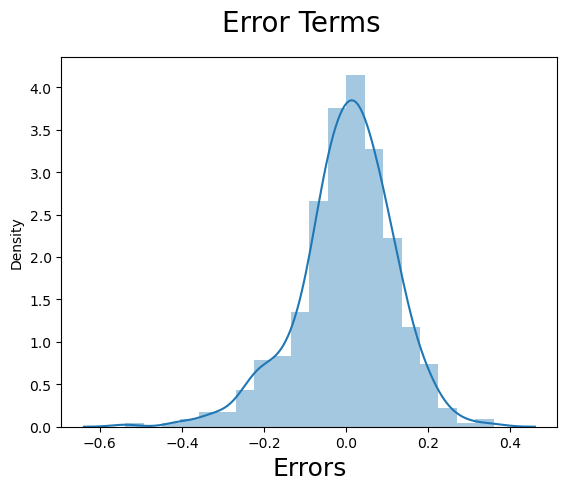

In [133]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [134]:
### Making Predictions 

In [135]:
df_train, df_test = train_test_split(bike, train_size = 0.7, random_state = 100)
print(df_train.shape)
df_test.shape

(510, 30)


(220, 30)

In [136]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tues,Wed,Light Rain/Snow,Mist + Clouds
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
y_test = df_test.pop('cnt')
X_test = df_test

In [138]:
X_test = df_test[["yr","workingday","windspeed","Spring","Winter","Jan","Sat","Light Rain/Snow",]]

In [139]:
#  Creating X_test_m6 dataframe and adding constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

In [140]:
X_test_m6.head()

,const,yr,workingday,windspeed,Spring,Winter,Jan,Sat,Light Rain/Snow
184,1.0,0,0,0.084219,0,0,0,0,0
535,1.0,1,1,0.153728,0,0,0,0,0
299,1.0,0,1,0.334206,0,1,0,0,0
221,1.0,0,1,0.339570,0,0,0,0,0
152,1.0,0,1,0.537414,0,0,0,0,0


In [141]:
# Now let's use our model to make predictions.

y_pred_m6 = lm.predict(X_test_m6)

### Model Evaluation

Let's now plot the graph for actual versus predicted values.

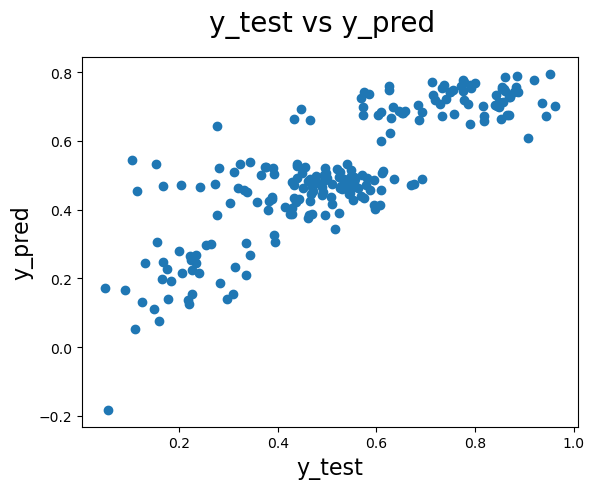

In [143]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 16)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    
plt.show()

#### As one of the predicted values is coming below 0, this model seems to have some issues. Also the adjusted r-square value was 0.727 which was on the lower side from we want (0.80). We will still check the r2_score for this as required.

In [145]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m6)

0.6928565473507393

#### The r2_score for the model created using RFE is coming out to around 0.693 which again suggests this model is inferior to the earlier model. I would like to submit the earlier one created manually as my final model. 

The equation for the final model is 
        
        cnt = 0.268 + 0.375temp + 0.235yr - 0.160Spring - 0.074(Mist + Clouds) - 0.287*(Light Rain/Snow) - 0.084*holiday

The r2_score for this model is 0.798